## Analyzing the backtest results

In [17]:
import logging
import os
import re
from kiteconnect import KiteConnect
from dotenv import load_dotenv
load_dotenv()
import bs_threading
from matplotlib import pyplot
import importlib
import time
from datetime import datetime, timedelta, timezone
import dateutil
import pandas as pd
importlib.reload(bs_threading)
from bs_threading import bs_threadify, bs_make_throttle_ready_func, bs_multiprocessify,f


In [18]:
# load all the stocks
# we do it together to the final of the sytem skk

INPUT_KITE_HISTORICAL_DIR = "input/kite_historical"
INPUT_KITE_INSTRUMENTS_DIR = "input/kite_instruments"
BACKTEST_DIR = "output/bsstonks_backtest"

In [50]:
for backtest_strategy_dir in os.listdir(BACKTEST_DIR):
    print(backtest_strategy_dir)

ema_overlap_20_50_15min
ema_overlap_20_50_day
ema_overlap_5_100_15min
ma_overlap_5_100_15min
rsi_45_15minute
rsi_45_15minute_from_2019
rsi_45_day
rsi_BNF_45_15minute_from_2019
rsi_NIFTY50_45_15minute_from_2019


In [62]:
backtest_strategy_dir = "rsi_NIFTY50_45_15minute_from_2019"
strategy_symbol_summary = []
for backtest_symbol_file in os.listdir(os.path.join(BACKTEST_DIR,backtest_strategy_dir)):
    print("---------------------")
    print(backtest_symbol_file)
    df = pd.read_csv(os.path.join(BACKTEST_DIR, backtest_strategy_dir, backtest_symbol_file))
    start_balance = df[df['buysell']=='sell'].iloc[0]['balance']
    end_balance = df[df['buysell']=='sell'].iloc[-1]['balance']
    pnl = (end_balance-100000)
    pnl_multiplier = pnl/100000
    print(pnl_multiplier)
    start_date = dateutil.parser.parse(df['date'].iloc[0])
    end_date = dateutil.parser.parse(df['date'].iloc[-1])
    span_days = (end_date-start_date).days
    
    pnl_percentage_multiplier_per_year = (pnl_multiplier-1)*100/span_days*365
    strategy_symbol_summary.append({
        'symbol':backtest_symbol_file,
        'p&l % per year': pnl_percentage_multiplier_per_year,
        'p&l %':(pnl_multiplier-1)*100,
        'p&l': pnl, 
        'trades': df.shape[0]/2
    })
#     print("100000", start_balance, end_balance)
#     print("P&L --> ", )


---------------------
256265_NIFTY 50_EQ_INDICES_NSE_15minute.csv
2.0024132822834386
---------------------
268041_NIFTY 500_EQ_INDICES_NSE_15minute.csv
1.7065187850894237


In [63]:
print("Strategy:", backtest_strategy_dir)
df_symbol_summary = pd.DataFrame(strategy_symbol_summary)
print(df_symbol_summary.columns)
df_symbol_summary.sort_values(by=["p&l % per year"], ascending=False).head(50)


Strategy: rsi_NIFTY50_45_15minute_from_2019
Index(['symbol', 'p&l % per year', 'p&l %', 'p&l', 'trades'], dtype='object')


,symbol,p&l % per year,p&l %,p&l,trades
0,256265_NIFTY 50_EQ_INDICES_NSE_15minute.csv,40.743970,100.241328,200241.328228,614.5
1,268041_NIFTY 500_EQ_INDICES_NSE_15minute.csv,35.966437,70.651879,170651.878509,454.5


---------------------
256265_NIFTY 50_EQ_INDICES_NSE_15minute.csv
losses (277,)
profit (335,)


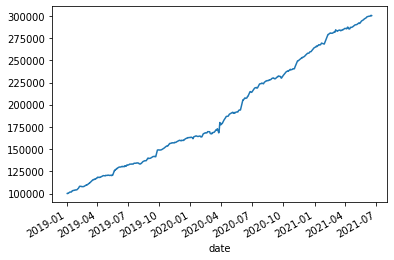

---------------------
268041_NIFTY 500_EQ_INDICES_NSE_15minute.csv
losses (196,)
profit (256,)


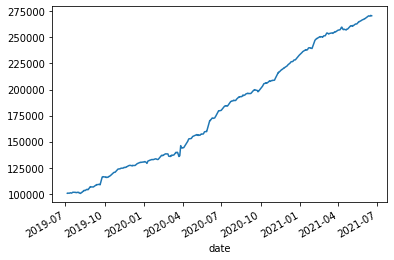

In [64]:
top_profits = df_symbol_summary.sort_values(by=["p&l % per year"], ascending=False).head(40)['symbol'].values
for backtest_symbol_file in os.listdir(os.path.join(BACKTEST_DIR,backtest_strategy_dir)):
    
    
    if backtest_symbol_file not in top_profits:
        continue
    print("---------------------")
    print(backtest_symbol_file)
    df = pd.read_csv(os.path.join(BACKTEST_DIR, backtest_strategy_dir, backtest_symbol_file), index_col="date", parse_dates=True, date_parser=dateutil.parser.parse)
#     df.index_col = 0
#     df.date.astype("datetime")
    df[df['buysell']=='sell']['balance'].plot()
    
    porl = df[df['buysell']=='sell']['balance'].diff()
    print("losses", porl[porl<0].shape)
    print("profit", porl[porl>0].shape)
    pyplot.show()

In [44]:
porl

date
2019-07-05 11:15:00+05:30             NaN
2019-07-05 12:45:00+05:30      255.232606
2019-07-09 12:15:00+05:30       81.889052
2019-07-09 13:15:00+05:30       80.968953
2019-07-09 13:45:00+05:30       53.659333
                                 ...     
2021-06-14 09:15:00+05:30    11025.935704
2021-06-16 09:45:00+05:30    24464.344755
2021-06-16 15:00:00+05:30      783.508915
2021-06-18 09:30:00+05:30     6306.682935
2021-06-18 12:45:00+05:30     5536.272729
Name: balance, Length: 454, dtype: float64